In [42]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [43]:
version = 16
zarr_path = f"../data/memory/memory_v{version}.zarr"
data = zarr.open(zarr_path, mode='r')
if version == 6 or version == 7 or version == 8 or version == 9 or version == 13 or version == 16:
    env = 4
elif version == 5:
    env = 3
else:
    env = 2

In [44]:
name = "env4_20gmts"
env = 4
zarr_path = f"../data/memory/{name}.zarr"
data = zarr.open(zarr_path, mode='r')

In [45]:
states = np.array(data['data']['state'])
filtered_states = states[(states[:, 2] == 0) & (states[:, 3] == 0)]

original_episode_ends = np.array(data['meta']['episode_ends'])
filtered_episode_ends = []

start_idx = 0
for end_idx in original_episode_ends:
    episode_mask = (states[start_idx:end_idx, 2] == 0) & (states[start_idx:end_idx, 3] == 0)
    num_filtered_rows = np.sum(episode_mask)
    filtered_episode_ends.append(num_filtered_rows + (filtered_episode_ends[-1] if filtered_episode_ends else 0))
    start_idx = end_idx

filtered_episode_ends = np.array(filtered_episode_ends)
obs = 32
start_idx = 0
episodes = []
for end_idx in filtered_episode_ends:
    episode = filtered_states[start_idx:end_idx]
    if len(episode) > obs:
        episodes.append(episode[obs:])
    start_idx = end_idx

In [46]:
#start_idx = 0
#episodes = []
#for end_idx in filtered_episode_ends:
#    episode = filtered_states[start_idx:end_idx]
#    if len(episode) > 16:
#        episodes.append(episode[16:])
#    start_idx = end_idx

In [47]:
episode_lengths = [len(episode) for episode in episodes]
mean_states = sum(episode_lengths) / len(episode_lengths)
min_length = min(episode_lengths)
episodes_fewer_than_32 = sum(1 for length in episode_lengths if length < 32)

print(f"The fewest number of states in an episode is: {min_length}")
print(f"Mean number of states per episode without goal knowledge: {mean_states}")
print(f"The number of episodes with fewer than 32 states is: {episodes_fewer_than_32}")


The fewest number of states in an episode is: 1
Mean number of states per episode without goal knowledge: 7.875
The number of episodes with fewer than 32 states is: 80


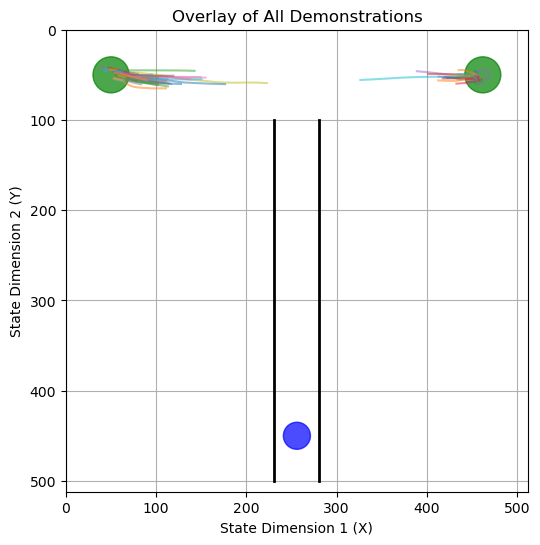

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
for episode in episodes:
    plt.plot(episode[:, 0], episode[:, 1], alpha=0.5)
    
if env == 2:
    plt.plot([206, 206], [450, 100], color='black', linewidth=2, label="Wall 1")
    plt.plot([306, 306], [450, 100], color='black', linewidth=2, label="Wall 2")

    ax = plt.gca()
    circle1 = patches.Circle((256, 400), 15, color='blue', alpha=0.7, label="Circle 1")
    ax.add_patch(circle1)
    circle2 = patches.Circle((400, 50), 20, color='green', alpha=0.7, label="Circle 2")
    ax.add_patch(circle2)
    circle3 = patches.Circle((112, 50), 20, color='green', alpha=0.7, label="Circle 3")
    ax.add_patch(circle3)
elif env==4:
    plt.plot([231, 231], [500, 100], color='black', linewidth=2, label="Wall 1")
    plt.plot([281, 281], [500, 100], color='black', linewidth=2, label="Wall 2")

    ax = plt.gca()
    circle1 = patches.Circle((256, 450), 15, color='blue', alpha=0.7, label="Circle 1")
    ax.add_patch(circle1)
    circle2 = patches.Circle((462, 50), 20, color='green', alpha=0.7, label="Circle 2")
    ax.add_patch(circle2)
    circle3 = patches.Circle((50, 50), 20, color='green', alpha=0.7, label="Circle 3")
    ax.add_patch(circle3)    
else:
    pass
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Overlay of All Demonstrations")
plt.xlabel("State Dimension 1 (X)")
plt.ylabel("State Dimension 2 (Y)")
plt.grid(True)
plt.savefig(f"images/overlay_plot_{name}_without_goal_knowledge_obs{obs}.png", dpi=300, bbox_inches='tight')
plt.show()